In [1]:
import sys
import time
import mahotas as mh
from pylab import gray, imshow, show
import os
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(0,'../..')
import omama as O
# !conda install -c conda-forge --yes --prefix {sys.prefix} mahotas

In [2]:
#config_num=2 ensures the laoding of our 2d_whitelist images (that obtained preds from the classifier )from memory
omama_loader = O.OmamaLoader(config_num=2)
data = O.Data(data_loader=omama_loader, load_cache=True)

In [3]:
lower=0
upper=10
tot_imgs=700
counter=0
batches_lists=[]

# read-in image paths in groups of 10
while True:
    with open(r"/raid/mpsych/whitelists/2D_whitelist_final.txt", 'r') as fp:
        counter+=1
        paths_list=fp.read().splitlines()[lower:upper]
        print(f"batch {counter}")
        batches_lists.append(paths_list)
        if upper == tot_imgs:
            break
        lower+=10
        upper+=10
print(f"Num lists within batches_lists: {len(batches_lists)}")

batch 1
batch 2
batch 3
batch 4
batch 5
batch 6
batch 7
batch 8
batch 9
batch 10
batch 11
batch 12
batch 13
batch 14
batch 15
batch 16
batch 17
batch 18
batch 19
batch 20
batch 21
batch 22
batch 23
batch 24
batch 25
batch 26
batch 27
batch 28
batch 29
batch 30
batch 31
batch 32
batch 33
batch 34
batch 35
batch 36
batch 37
batch 38
batch 39
batch 40
batch 41
batch 42
batch 43
batch 44
batch 45
batch 46
batch 47
batch 48
batch 49
batch 50
batch 51
batch 52
batch 53
batch 54
batch 55
batch 56
batch 57
batch 58
batch 59
batch 60
batch 61
batch 62
batch 63
batch 64
batch 65
batch 66
batch 67
batch 68
batch 69
batch 70
Num lists within batches_lists: 70


processed batch: 0
processed batch: 1
processed batch: 2
processed batch: 3
processed batch: 4
processed batch: 5
processed batch: 6
processed batch: 7
processed batch: 8
processed batch: 9
processed batch: 10
processed batch: 11
processed batch: 12
processed batch: 13
processed batch: 14
processed batch: 15
processed batch: 16
processed batch: 17
processed batch: 18
processed batch: 19
processed batch: 20
processed batch: 21
processed batch: 22
processed batch: 23
processed batch: 24
processed batch: 25
processed batch: 26
processed batch: 27
processed batch: 28
processed batch: 29
processed batch: 30
processed batch: 31
processed batch: 32
processed batch: 33
processed batch: 34
processed batch: 35
processed batch: 36
processed batch: 37
processed batch: 38
processed batch: 39
processed batch: 40
processed batch: 41
processed batch: 42
processed batch: 43
processed batch: 44
processed batch: 45
processed batch: 46
processed batch: 47
processed batch: 48
processed batch: 49
processed 

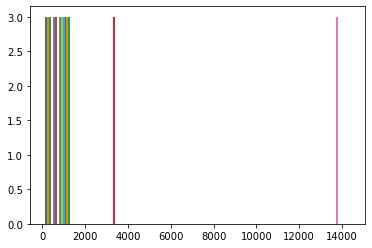

In [4]:
#generate image histograms via the mahotas library
hist_array_lists=[]
temp_list=[]
for idx in range(len(batches_lists)):
    image_list=batches_lists[idx]
    hist_array_lists.append([])
    for idx2 in range(len(image_list)):
        image_list[idx2] = data.get_image(path=image_list[idx2])
        img = image_list[idx2].pixels.astype(np.float32)
        img /= img.max()
        img *= 255
        hist_array_lists[idx].append(mh.features.haralick(img.astype(np.uint8))[1:])
    print(f"processed batch: {idx}")
print(f"\nExample object: \n{batches_lists[1][0]}")
print(f"\nExample histogram: \n{plt.hist(hist_array_lists[1][0])}")

In [5]:
# train an ECOD detector on the whole dataset of interest (therefore no need for test dataset)
# higher train_scores correspond to greater deviation from normality (i.e., outliers)
from pyod.models.ecod import ECOD
hist_array_list = [item for sublist in hist_array_lists for item in sublist]
clf = ECOD()
clf.fit(hist_array_list)
# get outlier scores
y_train_scores = clf.decision_scores_

ValueError: Found array with dim 3. Estimator expected <= 2.

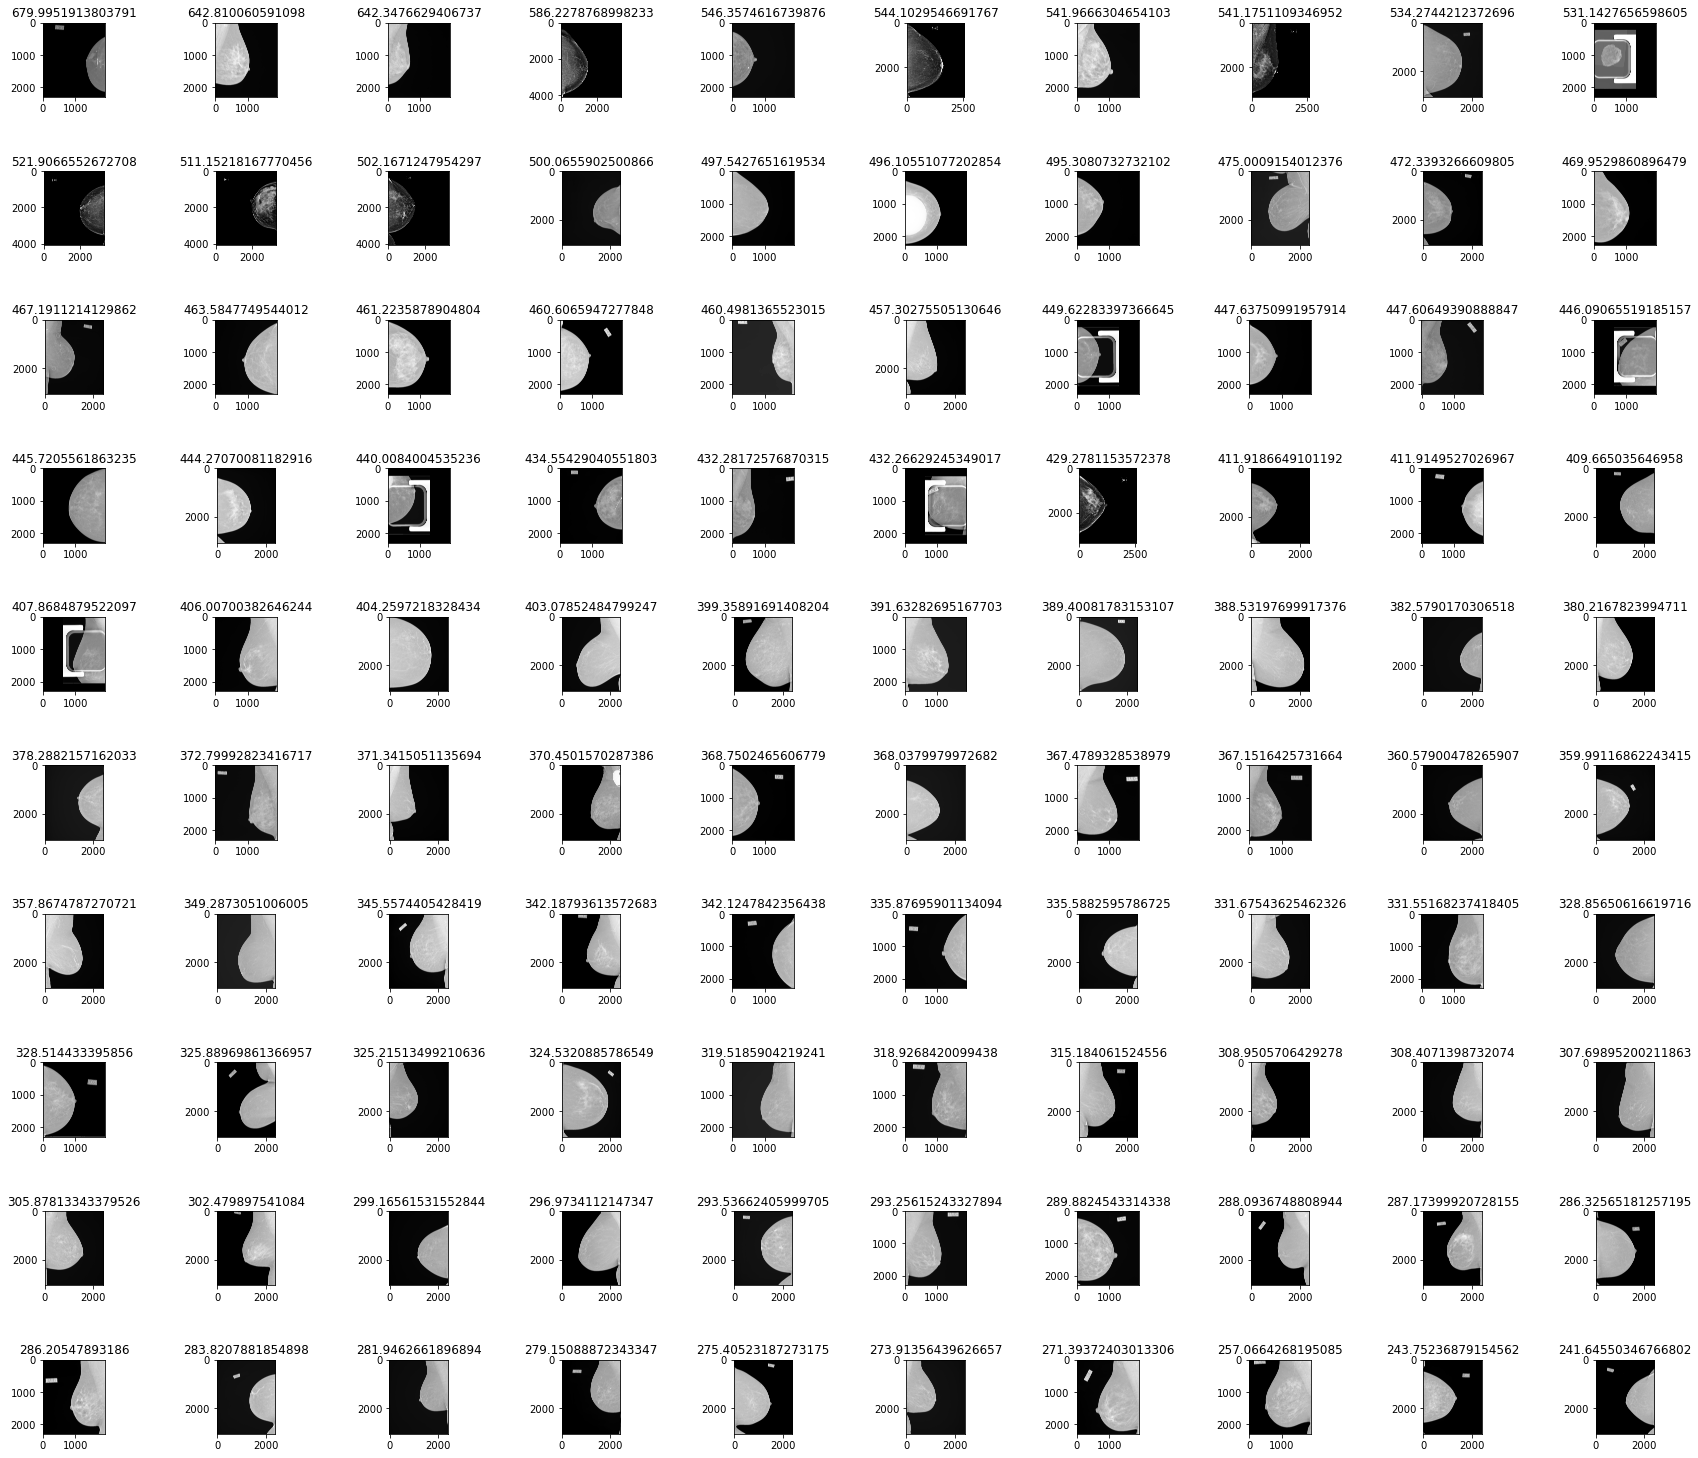

In [8]:
#view all images (order is from top left to bottom right, spanning 1 'row' at a time)
images_list = [item for sublist in batches_lists for item in sublist]
O.DataHelper.view_histogram_grid(images_list[0:100], train_scores=y_train_scores[0:100])

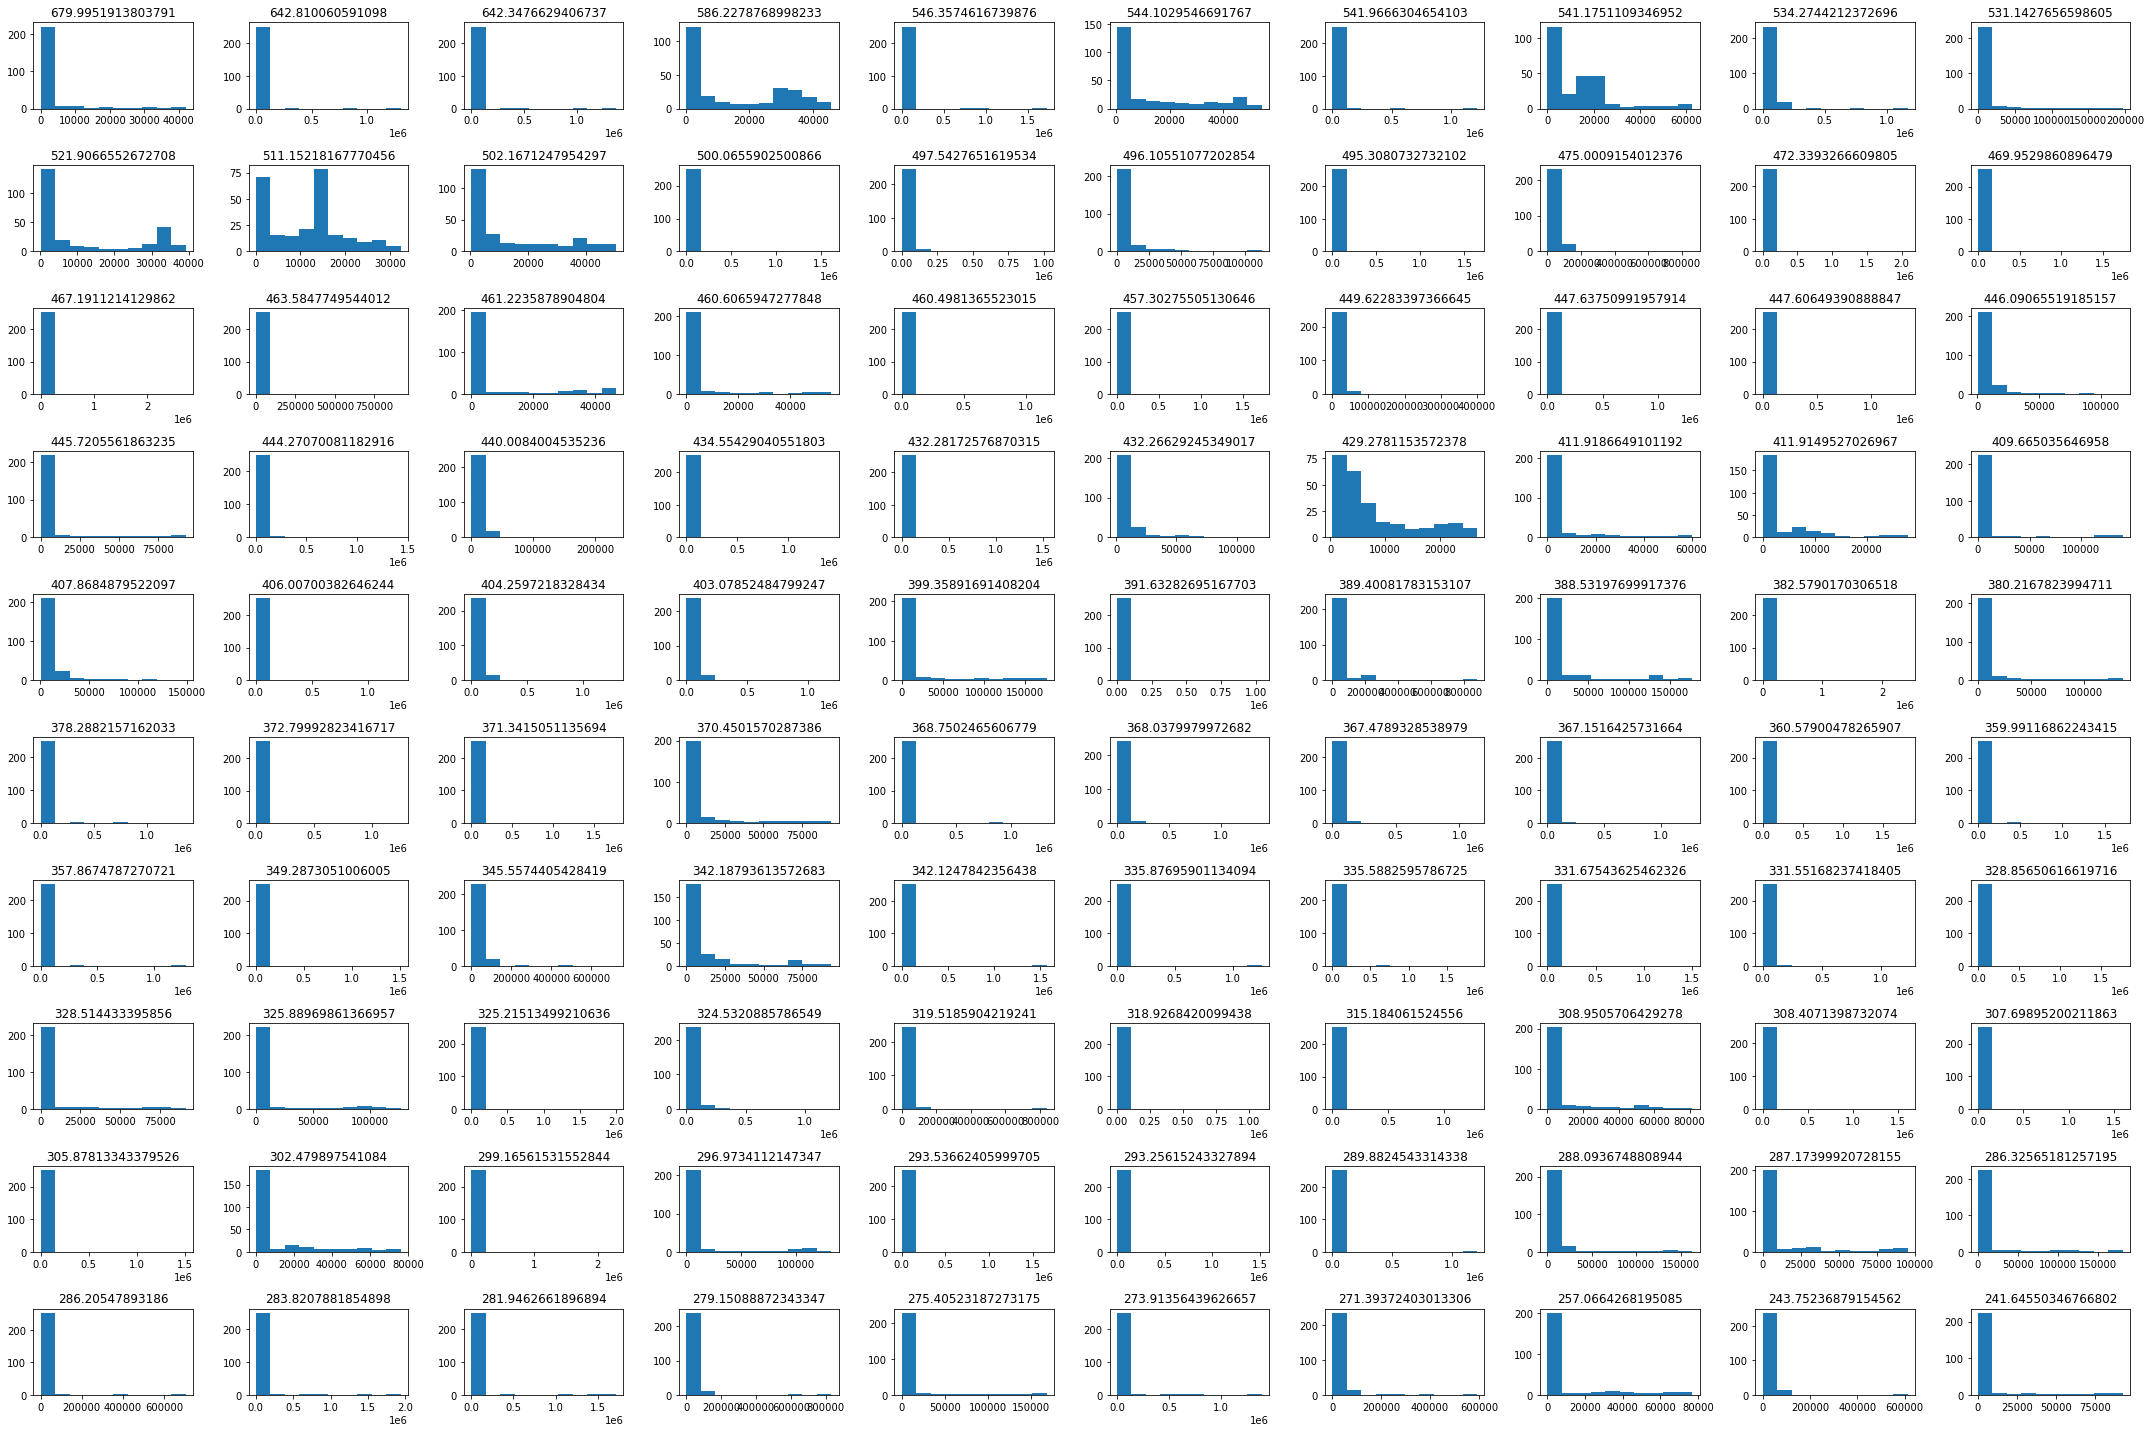

In [9]:
O.DataHelper.view_histogram_grid(images_list[0:100], train_scores=y_train_scores[0:100], hists=True)


Example image view: 



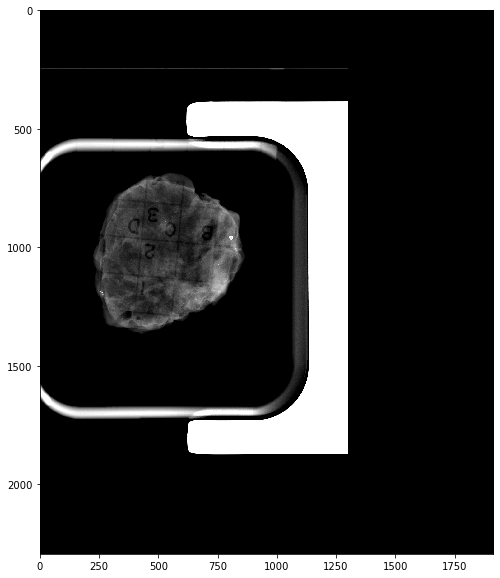

In [10]:
#example of an outlier
print("\nExample image view: \n")
O.DataHelper.view(batches_lists[1][6])